In [1]:
import sys
import os
import matplotlib.pyplot as plt 
import numpy as np 
import rt1plotpy

%load_ext autoreload
%autoreload 2   

from debug_init import *    
sys.path.insert(0,os.pardir)
import rt1kernel
import rt1raytrace

you have to "create_induced_point()" or "set_induced_point()" next.


Arcs  detection: 100%|██████████| 9/9 [00:01<00:00,  4.67it/s]


num of bound point is  229


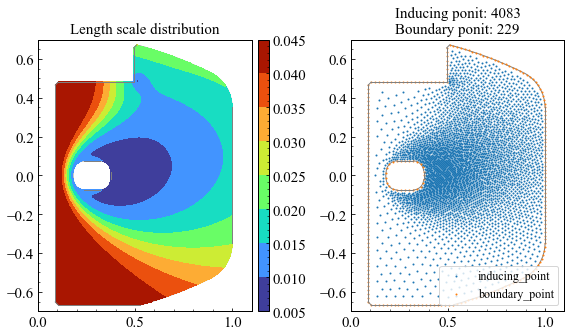

In [2]:
RT1_kernel = rt1kernel.Kernel2D_scatter(dxf_file='../dxf_files/simplest0.dxf',show_print=False)
RT1_kernel.load_point(**np.load('point_20220614.npz'),length_sq_fuction=Length_scale_sq,is_plot=True)

In [15]:
r_medium = np.linspace(0.05,1.05,150)
z_medium = np.linspace(-0.7,0.7,150)
r_plot   =np.linspace(0.05,1.05,500)
z_plot   =np.linspace(-0.7,0.7,500)

RT1_kernel.set_grid_interface( z_medium=z_medium,
                               r_medium=r_medium,
                               z_plot  =z_plot  ,
                               r_plot  =r_plot  ) 

Arcs  detection: 100%|██████████| 9/9 [00:01<00:00,  5.24it/s]


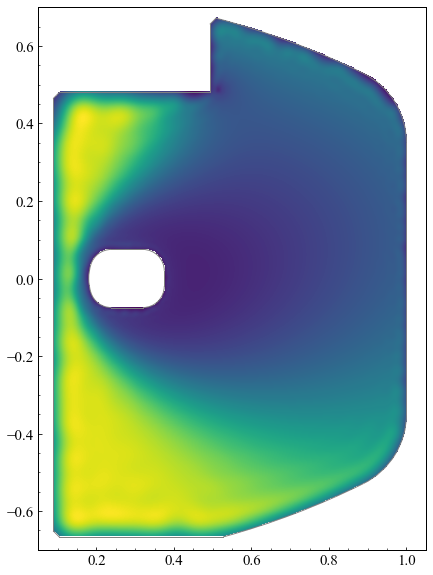

In [16]:
f = Length_scale(RT1_kernel.rI,RT1_kernel.zI)

F,mask,im_kwargs =  RT1_kernel.convert_grid(f)

fig,ax = plt.subplots(figsize=(10,10))
RT1_kernel.append_frame(ax)
ax.imshow(F*mask,**im_kwargs)

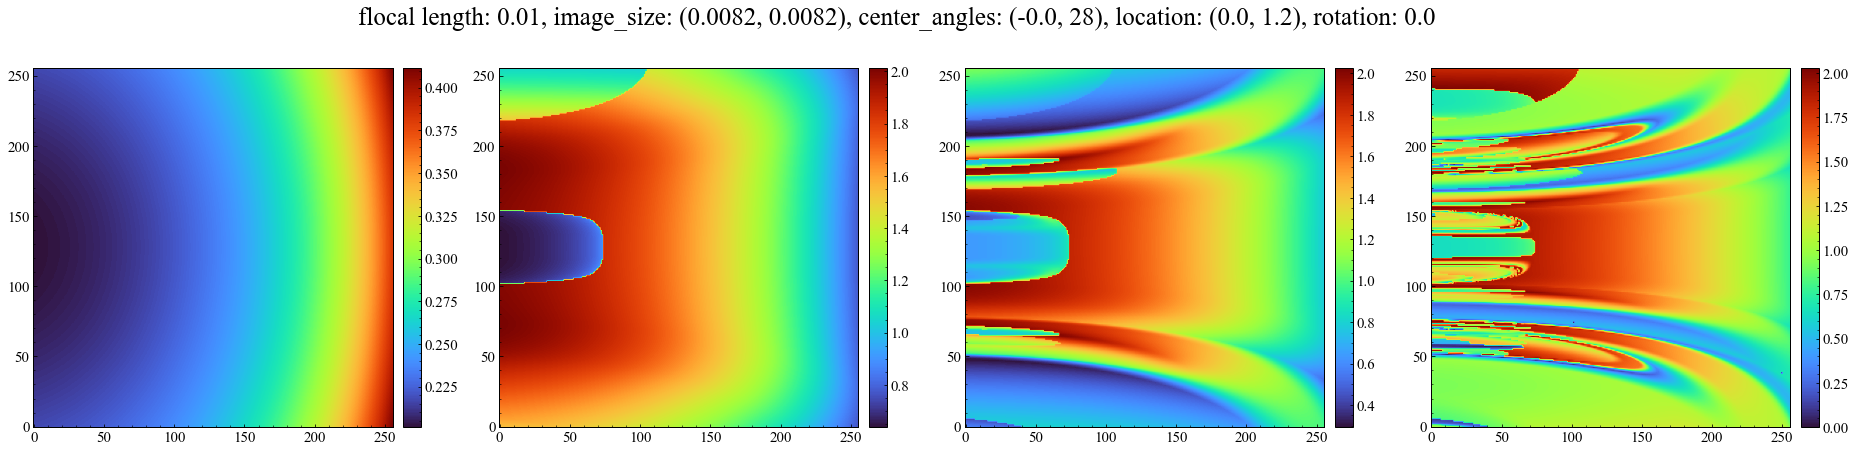

In [17]:
RT1_ray1 = rt1raytrace.Raytrace.load_model("model\\Raytrace_test-20220616.pkl",is_plot=True)

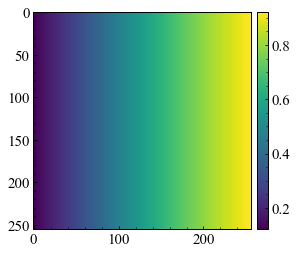

In [18]:
fig,ax = plt.subplots()
ray = RT1_ray1.rays[1]
imshow_cbar(fig,ax,ray.R0*np.sin(ray.Ho_theta0))

In [19]:
data = np.load('point_20220614.npz')
rI = data['rI']
zI = data['zI']

In [21]:
Theta = RT1_ray1.rays[3].Direction_Cos(R=rI,flatten=False)

(256, 256, 4083)


(256, 256, 4083)

0.22283449104896866 0.6348377672494669


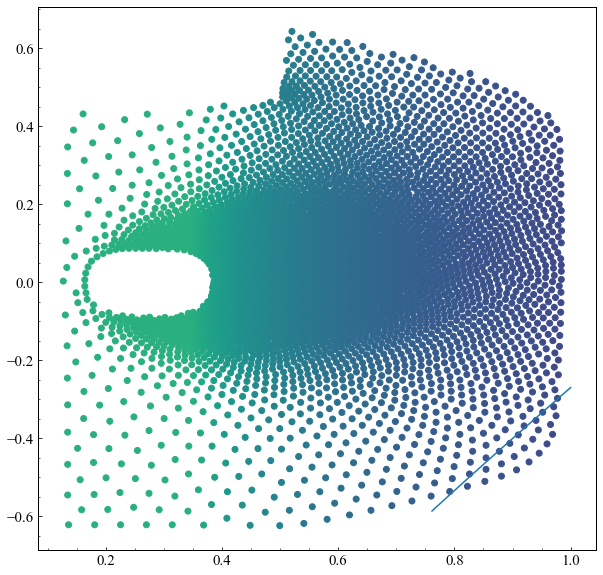

In [14]:
fig,ax = plt.subplots(figsize=(10,10))
Theta  = Theta.reshape(*RT1_ray1.rays[2].shape,rI.size)
R,Z = RT1_ray1.rays[3].RZ_ray(100)

i,j = 80,30
plt.scatter(x=rI,y=zI,c=Theta[i,j,:],vmin=0,vmax=1)

print(Theta[i,j,:].min(),Theta[i,j,:].max())
plt.plot(R[:,i,j],Z[:,i,j])